In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_pl = pd.read_csv("fpl_players.csv", index_col = 'id')
data_pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 1 to 476
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           503 non-null    int64  
 1   name                 503 non-null    object 
 2   teamId               503 non-null    object 
 3   position             503 non-null    object 
 4   minutes              503 non-null    int64  
 5   goals_scored         503 non-null    int64  
 6   assists              503 non-null    int64  
 7   saves                503 non-null    int64  
 8   clean_sheets         503 non-null    int64  
 9   goals_conceded       503 non-null    int64  
 10  penalties_saved      503 non-null    int64  
 11  yellow_cards         503 non-null    int64  
 12  red_cards            503 non-null    int64  
 13  creativity           503 non-null    float64
 14  total_points         503 non-null    int64  
 15  points_per_game      503 non-null    flo

In [3]:
data_pl.head()

,Unnamed: 0,name,teamId,position,minutes,goals_scored,assists,saves,clean_sheets,goals_conceded,penalties_saved,yellow_cards,red_cards,creativity,total_points,points_per_game,value_season,selected_by_percent,now_cost
id,,,,,,,,,,,,,,,,,,,
1,0,Mesut Özil,Arsenal,Midfielder,1439,1,3,0,5,20,0,1,0,582.9,53,2.9,7.6,2.0,70
2,1,Sokratis Papastathopoulos,Arsenal,Defender,1696,2,0,0,4,25,0,6,0,36.8,57,3.0,11.4,0.5,50
3,2,David Luiz Moreira Marinho,Arsenal,Defender,2809,2,1,0,8,42,0,5,2,106.7,94,2.8,17.1,2.6,55
4,3,Pierre-Emerick Aubameyang,Arsenal,Midfielder,3136,22,5,0,10,44,0,3,1,479.6,205,5.7,17.1,42.1,120
5,4,Cédric Soares,Arsenal,Defender,1553,1,1,0,4,20,0,1,0,218.9,61,2.9,12.2,0.6,50


In [4]:
data_pl.drop(['Unnamed: 0' ], axis = 1,  inplace = True)

In [5]:
data_pl.describe()

,minutes,goals_scored,assists,saves,clean_sheets,goals_conceded,penalties_saved,yellow_cards,red_cards,creativity,total_points,points_per_game,value_season,selected_by_percent,now_cost
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,1241.417495,1.781312,1.570577,3.840954,4.174950,17.687873,0.023857,2.037773,0.065606,184.186282,53.264414,2.128429,9.174751,2.981113,53.956262
std,1123.221621,3.595577,2.561298,18.275082,4.339801,16.382261,0.176924,2.586466,0.270881,253.283634,52.310973,1.554664,8.161074,6.087812,12.467251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.200000,0.200000,45.000000
50%,1037.000000,0.000000,0.000000,0.000000,3.000000,15.000000,0.000000,1.000000,0.000000,73.300000,43.000000,2.300000,8.200000,0.600000,50.000000
75%,2186.500000,2.000000,2.000000,0.000000,7.000000,31.000000,0.000000,3.000000,0.000000,287.750000,86.000000,3.100000,15.750000,2.500000,55.000000
max,3420.000000,23.000000,23.000000,139.000000,18.000000,63.000000,2.000000,12.000000,2.000000,1990.800000,251.000000,8.400000,30.900000,53.800000,120.000000


In [6]:
data_pl.isna().sum()

name                   0
teamId                 0
position               0
minutes                0
goals_scored           0
assists                0
saves                  0
clean_sheets           0
goals_conceded         0
penalties_saved        0
yellow_cards           0
red_cards              0
creativity             0
total_points           0
points_per_game        0
value_season           0
selected_by_percent    0
now_cost               0
dtype: int64

In [7]:
data_pl['GoalsPerMin'] = (data_pl['goals_scored']/data_pl['minutes']).astype(float)
data_pl.head()

,name,teamId,position,minutes,goals_scored,assists,saves,clean_sheets,goals_conceded,penalties_saved,yellow_cards,red_cards,creativity,total_points,points_per_game,value_season,selected_by_percent,now_cost,GoalsPerMin
id,,,,,,,,,,,,,,,,,,,
1,Mesut Özil,Arsenal,Midfielder,1439,1,3,0,5,20,0,1,0,582.9,53,2.9,7.6,2.0,70,0.000695
2,Sokratis Papastathopoulos,Arsenal,Defender,1696,2,0,0,4,25,0,6,0,36.8,57,3.0,11.4,0.5,50,0.001179
3,David Luiz Moreira Marinho,Arsenal,Defender,2809,2,1,0,8,42,0,5,2,106.7,94,2.8,17.1,2.6,55,0.000712
4,Pierre-Emerick Aubameyang,Arsenal,Midfielder,3136,22,5,0,10,44,0,3,1,479.6,205,5.7,17.1,42.1,120,0.007015
5,Cédric Soares,Arsenal,Defender,1553,1,1,0,4,20,0,1,0,218.9,61,2.9,12.2,0.6,50,0.000644


In [8]:
data_pl['AssistsPerMin'] = (data_pl['assists']/data_pl['minutes']).astype(float)
data_pl['SavesPerMin'] = (data_pl['saves']/data_pl['minutes']).astype(float)

In [9]:
TotalGoals = data_pl['goals_scored'].sum()
TotalAssists = data_pl['assists'].sum()
TotalYellow = data_pl['yellow_cards'].sum()
TotalRed = data_pl['red_cards'].sum()

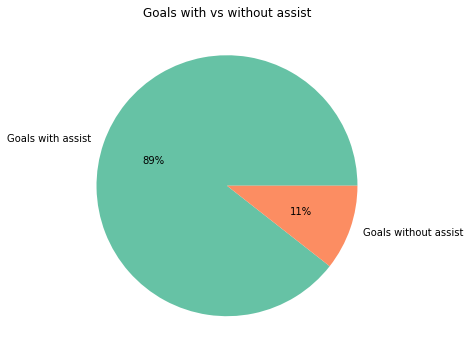

In [10]:
plt.figure(figsize = (12, 6))
data = [TotalGoals, TotalGoals - TotalAssists]
labels = ['Goals with assist', 'Goals without assist']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.title("Goals with vs without assist")
plt.show()

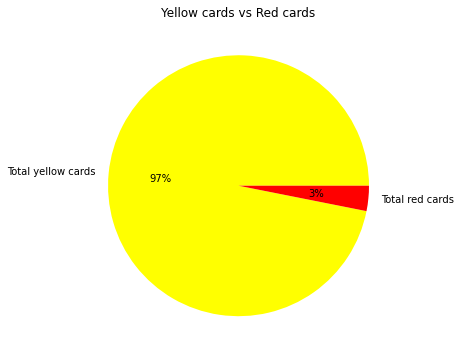

In [11]:
plt.figure(figsize = (12, 6))
data = [TotalYellow, TotalRed]
labels = ['Total yellow cards', 'Total red cards']
plt.pie(data, labels = labels, colors = ['yellow', 'red'], autopct = '%.0f%%')
plt.title("Yellow cards vs Red cards")
plt.show()

In [12]:
top_five_scorers = data_pl[['name', 'teamId', 'position', 'goals_scored']].nlargest(n=5, columns = 'goals_scored')
top_five_scorers

,name,teamId,position,goals_scored
id,,,,
224,Jamie Vardy,Leicester,Forward,23
4,Pierre-Emerick Aubameyang,Arsenal,Midfielder,22
366,Danny Ings,Southampton,Forward,22
276,Raheem Sterling,Man City,Midfielder,20
254,Mohamed Salah,Liverpool,Midfielder,19


In [13]:
top_five_assists = data_pl[['name', 'teamId', 'position', 'assists']].nlargest(n=5, columns = 'assists')
top_five_assists

,name,teamId,position,assists
id,,,,
272,Kevin De Bruyne,Man City,Midfielder,23
259,Trent Alexander-Arnold,Liverpool,Defender,15
275,Riyad Mahrez,Man City,Midfielder,14
390,Heung-Min Son,Spurs,Midfielder,13
255,Andrew Robertson,Liverpool,Defender,12


In [14]:
top_five_savers = data_pl[['name', 'teamId', 'minutes', 'saves']].nlargest(n=5, columns = 'saves')
top_five_savers

,name,teamId,minutes,saves
id,,,,
326,Martin Dubravka,Newcastle,3420,139
483,Aaron Ramsdale,Sheffield Utd,3330,128
96,Nick Pope,Burnley,3420,120
70,Mathew Ryan,Brighton,3420,117
8,Bernd Leno,Arsenal,2649,113


In [15]:
top_five_penalty_savers = data_pl[['name', 'teamId', 'minutes', 'penalties_saved']].nlargest(n=5, columns = 'penalties_saved')
top_five_penalty_savers

,name,teamId,minutes,penalties_saved
id,,,,
217,Kasper Schmeichel,Leicester,3420,2
455,Rui Pedro dos Santos Patrício,Wolves,3420,2
8,Bernd Leno,Arsenal,2649,1
96,Nick Pope,Burnley,3420,1
305,Dean Henderson,Man Utd,3240,1


In [16]:
top_five_redcards = data_pl[['name', 'teamId', 'minutes', 'red_cards']].nlargest(n=5, columns = 'red_cards')
top_five_yellowcards = data_pl[['name', 'teamId', 'minutes', 'yellow_cards']].nlargest(n=5, columns = 'yellow_cards')
top_five_redcards

,name,teamId,minutes,red_cards
id,,,,
3,David Luiz Moreira Marinho,Arsenal,2809,2
266,Fernando Luiz Rosa,Man City,2394,2
390,Heung-Min Son,Spurs,2478,2
4,Pierre-Emerick Aubameyang,Arsenal,3136,1
15,Ainsley Maitland-Niles,Arsenal,1382,1


In [17]:
top_five_yellowcards

,name,teamId,minutes,yellow_cards
id,,,,
138,Luka Milivojevic,Crystal Palace,2510,12
9,Granit Xhaka,Arsenal,2586,10
81,James Tarkowski,Burnley,3420,10
105,Jorge Luiz Frello Filho,Chelsea,2376,10
461,Romain Saïss,Wolves,2703,10


In [18]:
top_five_cost = data_pl[['name', 'teamId', 'minutes', 'now_cost']].nlargest(n=5, columns = 'now_cost')
top_five_cost

,name,teamId,minutes,now_cost
id,,,,
4,Pierre-Emerick Aubameyang,Arsenal,3136,120
251,Sadio Mané,Liverpool,2745,120
254,Mohamed Salah,Liverpool,2879,120
272,Kevin De Bruyne,Man City,2790,115
276,Raheem Sterling,Man City,2651,115


Text(0.5, 1.0, 'Plot of clubs vs Total Assists')

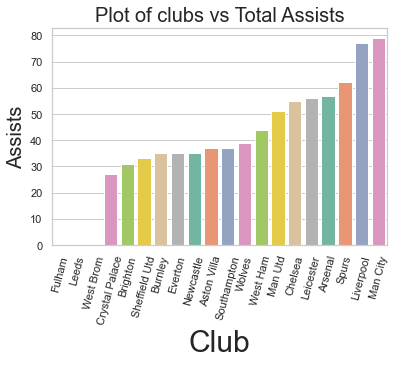

In [19]:
Assists_by_clubs = pd.DataFrame(data_pl.groupby('teamId', as_index = False)['assists'].sum())
sns.set_theme(style = 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'teamId', y = 'assists', data = Assists_by_clubs.sort_values(by='assists'), palette='Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of clubs vs Total Assists", fontsize = 20)

Text(0.5, 1.0, 'Plot of clubs vs Total Goals')

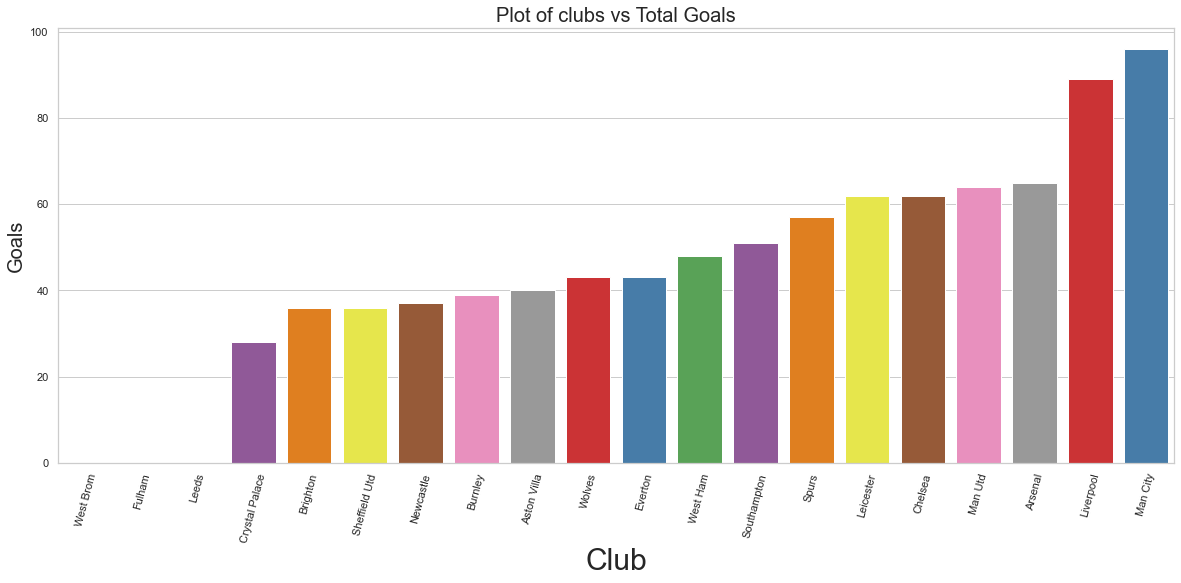

In [20]:
Goals_by_clubs = pd.DataFrame(data_pl.groupby('teamId', as_index = False)['goals_scored'].sum())
sns.set_theme(style = 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'teamId', y = 'goals_scored', data = Goals_by_clubs.sort_values(by='goals_scored'), palette='Set1')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Goals', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of clubs vs Total Goals", fontsize = 20)

Text(0.5, 1.0, 'Plot of clubs vs Total cost')

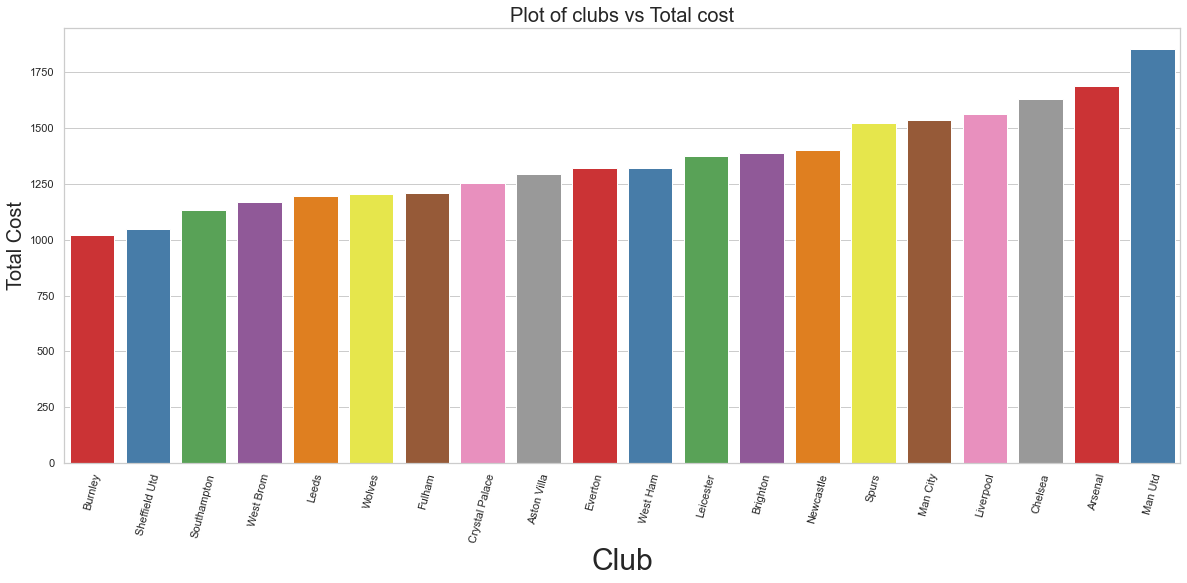

In [21]:
TotalCost_by_clubs = pd.DataFrame(data_pl.groupby('teamId', as_index = False)['now_cost'].sum())
sns.set_theme(style = 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'teamId', y = 'now_cost', data = TotalCost_by_clubs.sort_values(by='now_cost'), palette='Set1')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Total Cost', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of clubs vs Total cost", fontsize = 20)

In [22]:
top_five_defenfers = data_pl[data_pl['position'] == 'Defender'][['name', 'teamId', 'minutes', 'clean_sheets']].nlargest(n=5, columns = 'clean_sheets')
top_five_defenfers

,name,teamId,minutes,clean_sheets
id,,,,
81,James Tarkowski,Burnley,3420,15
250,Virgil van Dijk,Liverpool,3420,15
259,Trent Alexander-Arnold,Liverpool,3173,14
88,Ben Mee,Burnley,2880,13
219,Jonny Evans,Leicester,3384,13


Text(0.5, 1.0, 'Plot of clubs vs Cost mean')

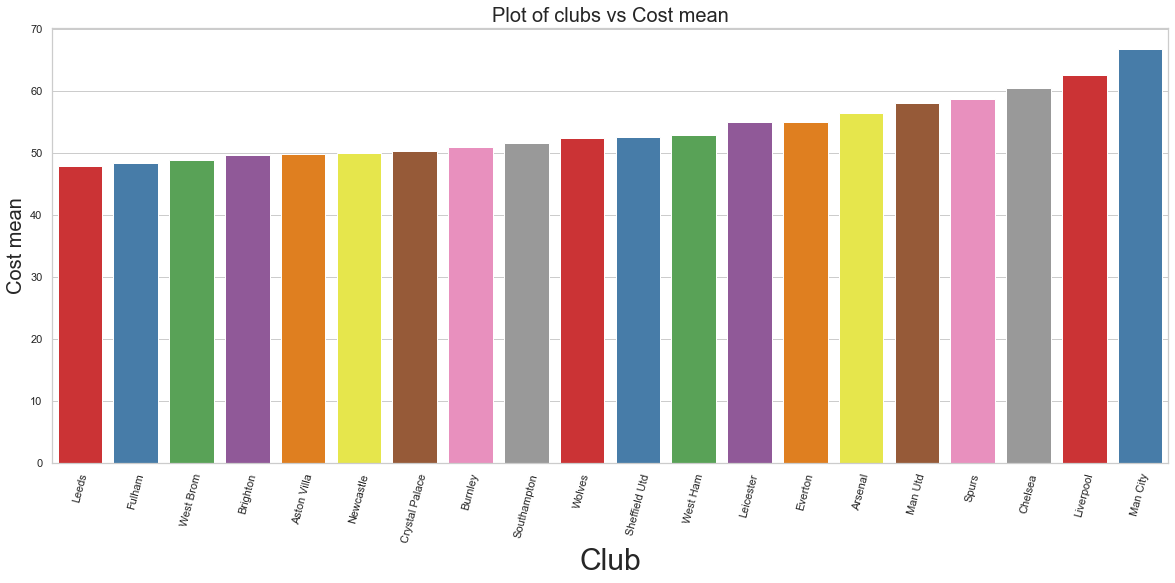

In [23]:
TotalCost_by_clubs = pd.DataFrame(data_pl.groupby('teamId', as_index = False)['now_cost'].mean())
sns.set_theme(style = 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'teamId', y = 'now_cost', data = TotalCost_by_clubs.sort_values(by='now_cost'), palette='Set1')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Cost mean', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of clubs vs Cost mean", fontsize = 20)

Text(0.5, 1.0, 'Plot of clubs vs Total points')

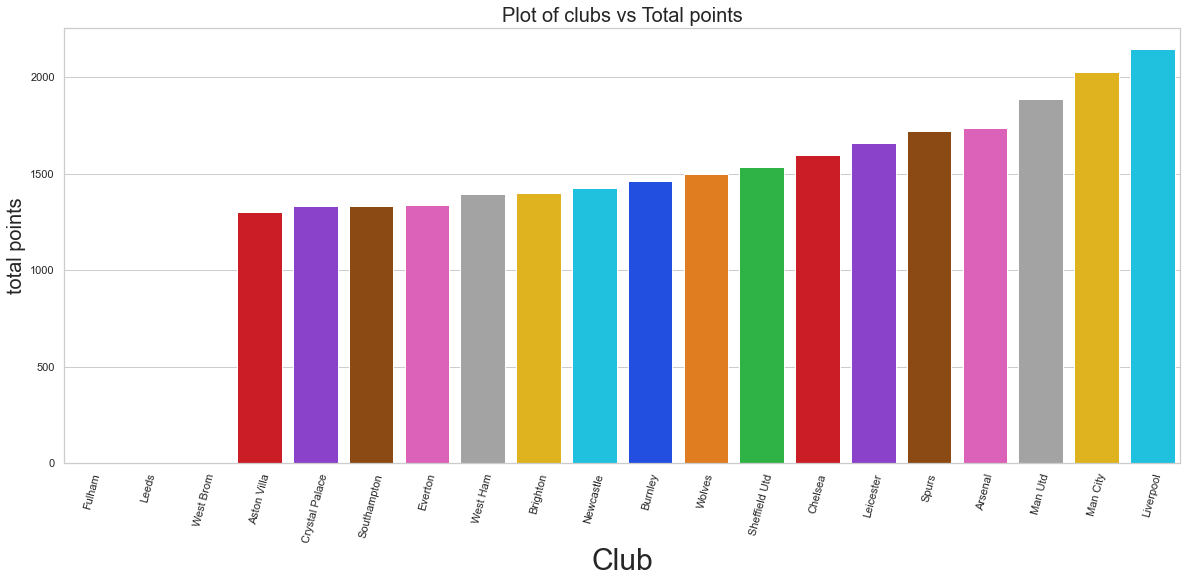

In [24]:
TotalPoints_by_clubs = pd.DataFrame(data_pl.groupby('teamId', as_index = False)['total_points'].sum())
sns.set_theme(style = 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'teamId', y = 'total_points', data = TotalPoints_by_clubs.sort_values(by='total_points'), palette='bright')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('total points', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of clubs vs Total points", fontsize = 20)